# Car insurances EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This dataset was extracted from Kaggle: https://www.kaggle.com/datasets/sagnik1511/car-insurance-data/data

In [2]:
data = pd.read_csv('../../data/raw/car_insurance.csv')

In [3]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
data.shape

(10000, 19)

Our goal is to predict if a customer has claimed his loan or not attending some features. The target column is _OUTCOME_ that is 1 if the loan has been claimed and 0 if not. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

We have some categorical features that will be encoded. The ID column will be removed.

In [6]:
data.isna().sum().sum()

1939

In [7]:
for col in data.columns:
    if data[col].isna().sum() != 0:
        print(f'{col}: {data[col].isna().sum()}')

CREDIT_SCORE: 982
ANNUAL_MILEAGE: 957


We are going to fill that missing values with their means

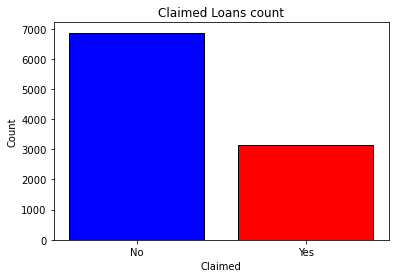

In [17]:
counts = data.OUTCOME.value_counts()

plt.bar(['No', 'Yes'], counts, color=['blue', 'red'], edgecolor='black') 
plt.title('Claimed Loans count')
plt.xlabel('Claimed')
plt.ylabel('Count')
plt.show()

In [19]:
print('We have ' + str(counts[0]) + ' unclaimed loans and ' + str(counts[1]) + ' claimed ones. In other words, ' + str(round(100*counts[0]/counts.sum(),2)) + 
         '% haven'+"'" 't been claimed and ' + str(round(100*counts[1]/counts.sum(), 2)) + '% have been claimed.') 

We have 6867 unclaimed loans and 3133 claimed ones. In other words, 68.67% haven't been claimed and 31.33% have been claimed.


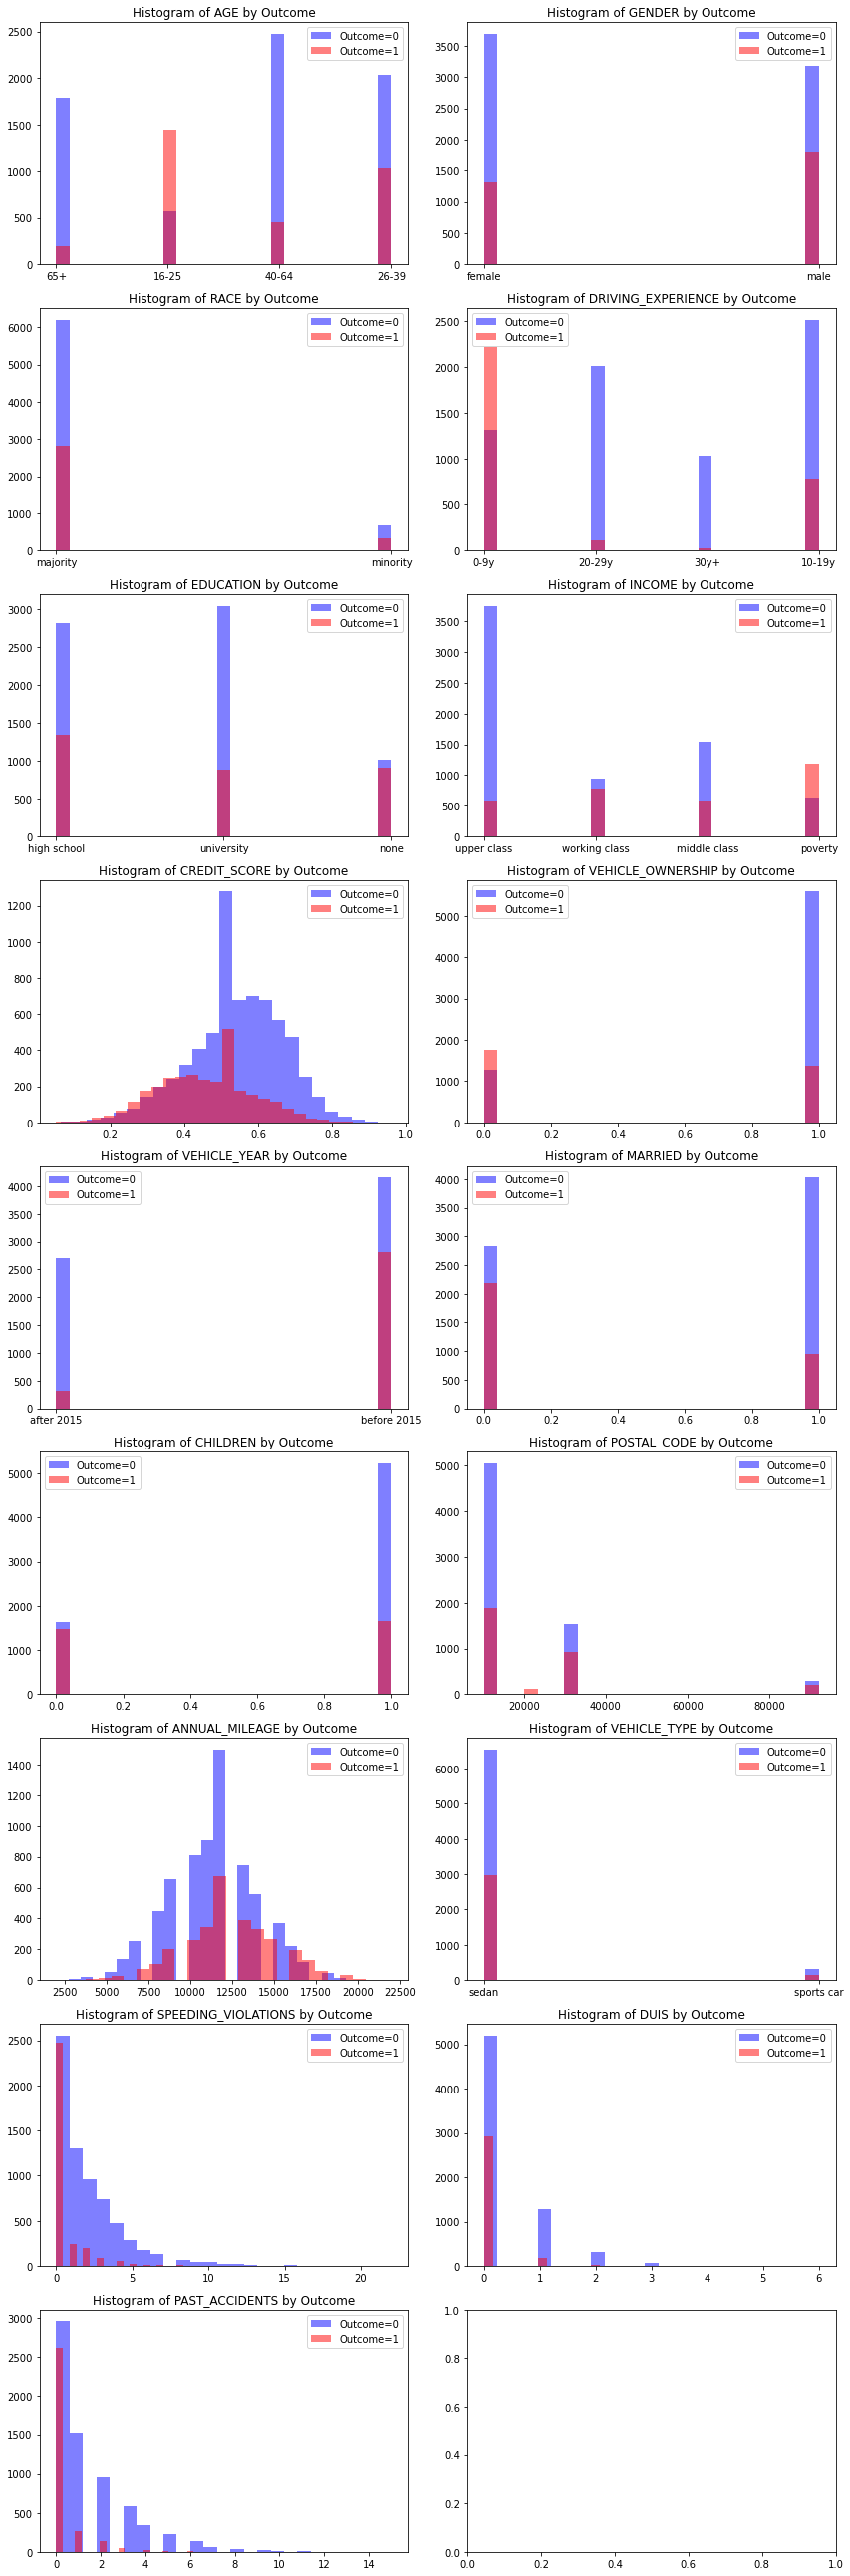

In [23]:
fig, axs = plt.subplots(nrows=9, ncols=2, figsize=(12, 36))
axs = axs.flatten()

for i, col in enumerate(data.columns.drop(['ID', 'OUTCOME'])):
    axs[i].hist(data.loc[data.OUTCOME == 0][col], color='blue', alpha=0.5, bins=25)
    axs[i].hist(data.loc[data.OUTCOME == 1][col], color='red', alpha=0.5, bins=25)
    axs[i].set_title(f'Histogram of {col} by Outcome')
    axs[i].legend(['Outcome=0', 'Outcome=1'])
    
plt.tight_layout()
plt.show()